# Capstone - Exploratory-Data-Analysis

## Fetching Content from the Web

### Author: Hayley Massey

### Exploratory-Data-Analysis

In [1]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.

from collections import Counter

import requests
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.6.2.post1
appdirs                   1.4.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
astroid                   3.3.5
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.1
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.8
decorator                 5.1.1
defusedxml

# Objective 1
Fetch data from API and write it to a CSV file

In [3]:
import requests
import pandas as pd
import os
from dotenv import load_dotenv

load_dotenv()
def get_API_key():
    # Keep secrets in a .env file - load it, read the values.
    # Load environment variables from .env file
    load_dotenv()
    key = os.getenv("OPEN_FOOTBALL_API_KEY")
    return key


# Your API key from RapidAPI
api_key = get_API_key()
API_HOST = "api-football-v1.p.rapidapi.com"
API_URL = "https://api-football-v1.p.rapidapi.com/v3/standings"

# Mapping leagues to their respective league IDs (You can extend or modify this list)
LEAGUE_IDS = {
    "English Premier League": 39
    
}

# Function to fetch standings from the API
def get_standings(league_id):
    headers = {
        "X-RapidAPI-Key": api_key,
        "X-RapidAPI-Host": API_HOST
    }
    params = {
        "league": league_id,
        "season": 2024  # Modify this for the correct season if necessary
    }

    # Send GET request to API
    response = requests.get(API_URL, headers=headers, params=params)
    
    if response.status_code == 200:
        data = response.json()
        standings = data['response'][0]['league']['standings'][0]

        # Create a list of dictionaries for teams and their standings
        standings_list = []
        for team in standings:
            standings_list.append({
                "Rank": team['rank'],
                "Team": team['team']['name'],
                "Played": team['all']['played'],
                "Won": team['all']['win'],
                "Drawn": team['all']['draw'],
                "Lost": team['all']['lose'],
                "Points": team['points']
            })
        
        # Return the standings as a DataFrame
        return pd.DataFrame(standings_list)
    else:
        print(f"Error: Unable to fetch data. HTTP Status Code: {response.status_code}")
        return None

# Function to save standings to CSV
def save_standings_to_csv(league_name, league_id, file_name):
    print(f"Fetching standings for {league_name}...")
    standings_df = get_standings(league_id)
    
    if standings_df is not None:
        # Write DataFrame to CSV
        standings_df.to_csv(file_name, index=False)
        print(f"Standings for {league_name} saved to {file_name}")
    else:
        print(f"Failed to fetch standings for {league_name}")

# Fetch and save standings for each league
for league_name, league_id in LEAGUE_IDS.items():
    # Generate a unique file name for each league's standings CSV
    file_name = f"{league_name.replace(' ', '_')}_standings_match13.csv"
    save_standings_to_csv(league_name, league_id, file_name)

Fetching standings for English Premier League...
Standings for English Premier League saved to English_Premier_League_standings_match13.csv


# Objective 2

Read the recently created csv file and display the first ten rows

In [4]:
# Import pandas
import pandas as pd

# reading csv file 
standings = pd.read_csv("English_Premier_League_standings_match13.csv")
print(standings.head(10))

   Rank               Team  Played  Won  Drawn  Lost  Points
0     1          Liverpool      13   11      1     1      34
1     2            Arsenal      13    7      4     2      25
2     3            Chelsea      13    7      4     2      25
3     4           Brighton      13    6      5     2      23
4     5    Manchester City      13    7      2     4      23
5     6  Nottingham Forest      13    6      4     3      22
6     7          Tottenham      13    6      2     5      20
7     8          Brentford      13    6      2     5      20
8     9  Manchester United      13    5      4     4      19
9    10             Fulham      13    5      4     4      19


In [5]:
# Calculate the mean of a specific column, e.g., 'Points'
mean_points = standings['Points'].mean()
print(mean_points)

mode_points =standings['Points'].mode()
print(mode_points)

median_points =standings['Points'].median()
print(median_points)

17.7
0    19
Name: Points, dtype: int64
19.0


In [6]:
# Minimum value in the 'Points' column
min_points = standings['Points'].min()
print("Minimum Points:", min_points)

# Maximum value in the 'Points' column
max_points = standings['Points'].max()
print("Maximum Points:", max_points)

Minimum Points: 5
Maximum Points: 34


# Objective 3

Describe the data. Is it an object, or integer?

In [7]:
standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    20 non-null     int64 
 1   Team    20 non-null     object
 2   Played  20 non-null     int64 
 3   Won     20 non-null     int64 
 4   Drawn   20 non-null     int64 
 5   Lost    20 non-null     int64 
 6   Points  20 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.2+ KB


# Objective 4

Display the data with graphs and visuals

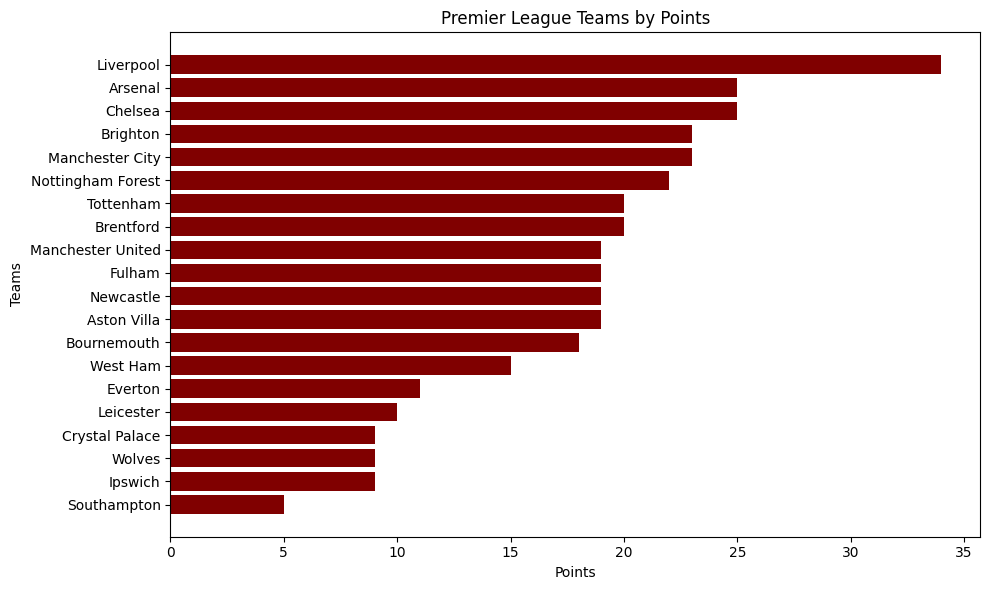

In [10]:
import csv
import matplotlib.pyplot as plt

# File path for the CSV
csv_file_path = 'English_Premier_League_standings_match13.csv'

# Read data from CSV
teams = []
points = []

with open(csv_file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    # Extract team names and their points
    for row in csv_reader:
        teams.append(row['Team'])
        points.append(int(row['Points']))

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(teams, points, color='maroon')  # Horizontal bar chart
plt.xlabel('Points')
plt.ylabel('Teams')
plt.title('Premier League Teams by Points')
plt.gca().invert_yaxis()  # Invert the y-axis so that the top team appears at the top
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

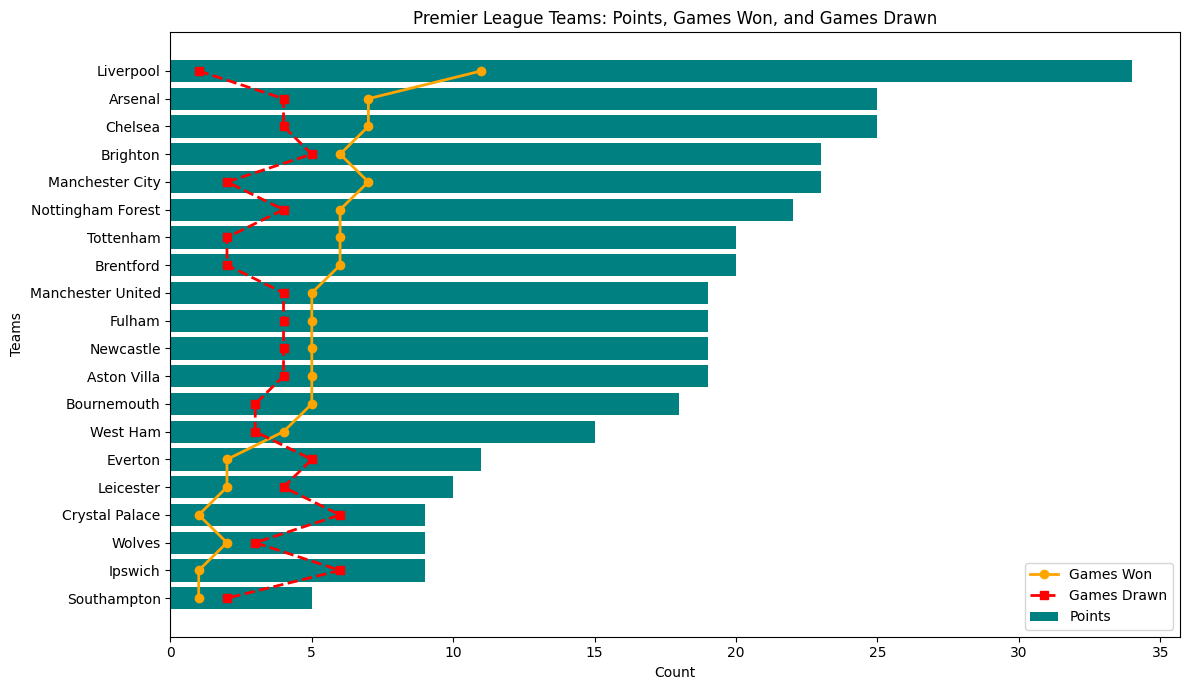

In [14]:
import csv
import matplotlib.pyplot as plt

# File path for the CSV
csv_file_path = 'English_Premier_League_standings_match13.csv'

# Read data from CSV
teams = []
points = []
games_won = []
games_drawn = []

with open(csv_file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    # Extract team names, points, games won, and games drawn
    for row in csv_reader:
        teams.append(row['Team'])
        points.append(int(row['Points']))
        games_won.append(int(row['Won']))
        games_drawn.append(int(row['Drawn']))

# Sorting the teams based on points (descending order)
team_data = list(zip(teams, points, games_won, games_drawn))
team_data.sort(key=lambda x: x[1], reverse=True)  # Sort by points

# Unzip the sorted list back into teams, points, games_won, and games_drawn
teams, points, games_won, games_drawn = zip(*team_data)

# Plotting the bar chart for points
plt.figure(figsize=(12, 7))

# Bar chart for points
plt.barh(teams, points, color='teal', label='Points')

# Line chart for games won (overlay)
plt.plot(games_won, teams, color='orange', marker='o', markersize=6, label='Games Won', linestyle='-', linewidth=2)

# Line chart for games drawn (overlay)
plt.plot(games_drawn, teams, color='red', marker='s', markersize=6, label='Games Drawn', linestyle='--', linewidth=2)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Teams')
plt.title('Premier League Teams: Points, Games Won, and Games Drawn')
plt.gca().invert_yaxis()  # Invert y-axis so the top team is at the top

# Display the legend
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Conclusion

Soccer standings are not just based on games won, but also losses and games drawn.